### A. Import thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
trending_videos = pd.read_csv('Data/data.csv').iloc[:, 1:]

pd.options.display.float_format = '{:,.0f}'.format
# pd.options.display.float_format = None

### B. Trực quan hoá

#### 1. Phân tích thống kê tổng quan

##### a. Lượt xem, lượt thích, bình luận

In [ ]:
# Xác định bảng gồm các chỉ số thống kê
# của Lượt xem, lượt thích, bình luận 
general_trending_videos = trending_videos[["view_count", "like_count", "comment_count"]]

general_trending_videos.describe()


,view_count,like_count,comment_count
count,"19,068","19,068","19,068"
mean,"16,256,068","426,946","5,096"
std,"29,022,369","986,760","23,661"
min,"187,782",0,0
25%,"1,675,452","28,106",132
50%,"3,392,019","62,688",414
75%,"16,896,668","300,956","1,973"
max,"300,392,468","11,040,218","438,822"


In [98]:
#lọc dữ liệu để vẽ đồ thị
general_month = trending_videos.loc[::, ["snapshot_date", "view_count", "like_count", "comment_count"]]

general_month['snapshot_date'] = pd.to_datetime(general_month['snapshot_date'])
general_month['snapshot_date'] = general_month['snapshot_date'].dt.to_period('M')
general_month = general_month.groupby('snapshot_date').mean().reset_index()

general_month

,snapshot_date,view_count,like_count,comment_count
0,2023-10,"8,989,065","230,480","6,008"
1,2023-11,"7,533,285","205,610","7,121"
2,2023-12,"8,209,460","240,579","3,331"
3,2024-01,"11,094,363","286,441","2,625"
4,2024-02,"16,053,756","397,709","3,203"
5,2024-03,"19,367,155","497,743","6,155"
6,2024-04,"17,962,545","502,871","4,186"
7,2024-05,"22,493,446","594,208","3,264"
8,2024-06,"20,457,569","525,465","6,039"
9,2024-07,"21,764,379","656,342","9,457"


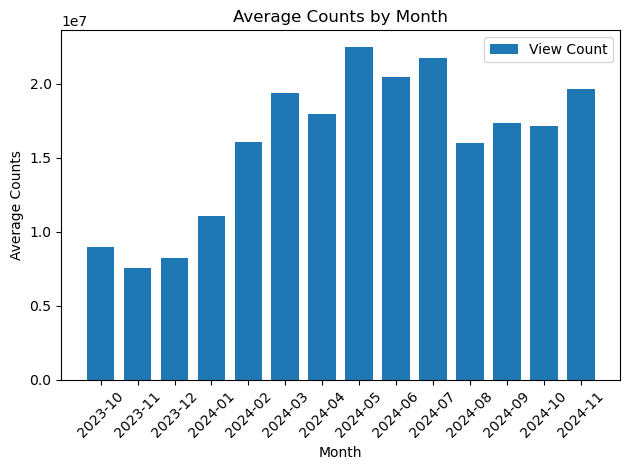

In [107]:
# vẽ các đồ thị thể hiện phân bố của lượt xem, lượt thích, bình luận (làm tròn theo 1000)
#ví dụ 
x = range(len(general_month['snapshot_date']))
width = 0.75

plt.bar(x, general_month['view_count'], width=width, label='View Count')
# Thêm nhãn và tiêu đề
plt.xticks(x, general_month['snapshot_date'].astype(str), rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Counts')
plt.title('Average Counts by Month')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

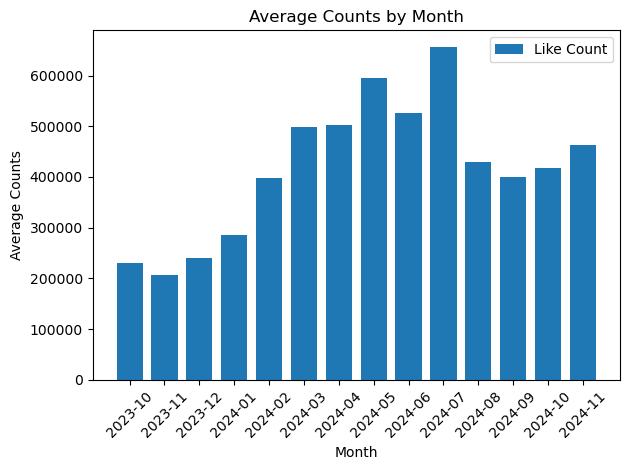

In [105]:
# vẽ các đồ thị thể hiện phân bố của lượt xem, lượt thích, bình luận (làm tròn theo 1000)
#ví dụ 
x = range(len(general_month['snapshot_date']))
width = 0.75

plt.bar(x, general_month['like_count'], width=width, label='Like Count')

# Thêm nhãn và tiêu đề
plt.xticks(x, general_month['snapshot_date'].astype(str), rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Counts')
plt.title('Average Counts by Month')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

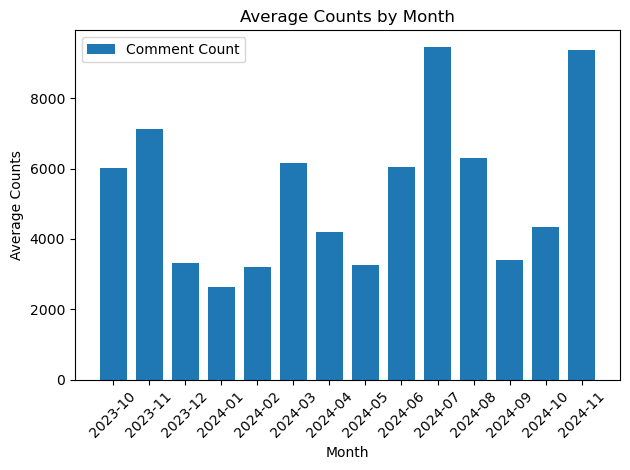

In [109]:
# vẽ các đồ thị thể hiện phân bố của lượt xem, lượt thích, bình luận (làm tròn theo 1000)
#ví dụ 
x = range(len(general_month['snapshot_date']))
width = 0.75

plt.bar(x, general_month['comment_count'], width=width, label='Comment Count')

# Thêm nhãn và tiêu đề
plt.xticks(x, general_month['snapshot_date'].astype(str), rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Counts')
plt.title('Average Counts by Month')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [113]:
#=> phân bố của các chỉ số
pd.options.display.float_format = None
general_month['like_to_view'] = (general_month['like_count'] / general_month['view_count']) * 100
general_month.loc[..., ['snapshot_date', 'like_to_view']]

,snapshot_date,like_to_view
0,2023-10,2.564006
1,2023-11,2.729353
2,2023-12,2.930510
3,2024-01,2.581857
4,2024-02,2.477359
5,2024-03,2.570037
6,2024-04,2.799551
7,2024-05,2.641692
8,2024-06,2.568560
9,2024-07,3.015670


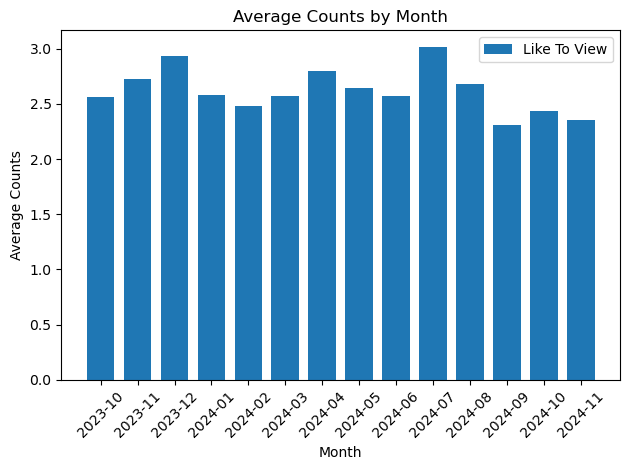

In [ ]:
x = range(len(general_month['snapshot_date']))
width = 0.75

plt.bar(x, general_month['like_to_view'], width=width, label='Like To View')

# Thêm nhãn và tiêu đề
plt.xticks(x, general_month['snapshot_date'].astype(str), rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Like To View')
plt.title('Average Counts by Month')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##### b. Thời lượng video

In [ ]:
#xác định các chỉ số thống kê của thời lượng video


count       18430
unique        653
top       0:01:00
freq         1416
Name: duration, dtype: object

In [ ]:
# xác định bảng gồm thời lượng video (dưới 1p, 5 phút, 5–10 phút, trên 10 phút)
# và số video của thời lượng đó theo mốc thời gian 1 tháng 

In [ ]:
# vẽ đồ thị thể hiện tỉ lệ của các khoảng thời gian trên với mốc 1 tháng
#x-thời lượng 4 khoảng, y-số video

In [ ]:
#=> Video thời lượng bao nhiêu dễ đạt trending nhất?

##### c. Thời gian đạt trending và tồn tại trong trending

In [ ]:
trending_videos = pd.read_csv('Data/data.csv').iloc[::,1:]
trending_videos['snapshot_date'] = pd.to_datetime(trending_videos['snapshot_date'])
trending_videos['month_year'] = trending_videos['snapshot_date'].dt.to_period('M')

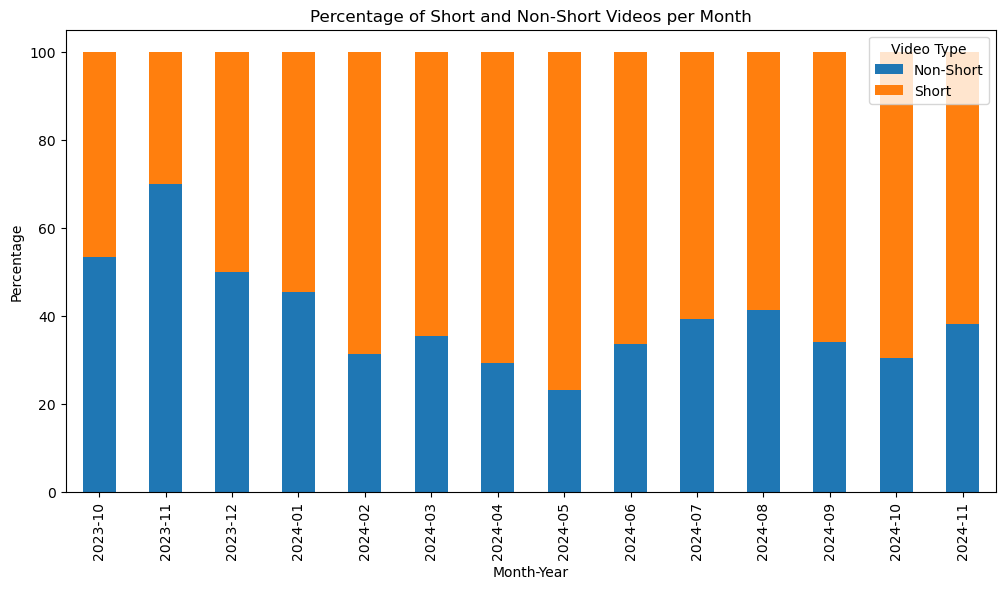

In [ ]:
short_videos = trending_videos.groupby('month_year')['is_short'].value_counts(normalize=True).unstack().fillna(0) * 100
short_videos.plot(kind='bar', figsize=(12, 6),stacked=True)
plt.title('Percentage of Short and Non-Short Videos per Month')
plt.xlabel('Month-Year')
plt.ylabel('Percentage')
plt.legend(['Non-Short', 'Short'], title='Video Type')
plt.show()

##### b. Biểu đồ thể hiện tỉ trọng của các chủ đề video

In [ ]:
trending_videos = pd.read_csv('Data/data.csv')
trending_videos = trending_videos[['snapshot_date', 'category']]
trending_videos['category'] = trending_videos['category'].fillna('Unknown')
category_counts = trending_videos['category'].value_counts()
trending_videos['category'] = trending_videos['category'].apply(lambda x: x if category_counts[x] >= 800 else 'Others')
trending_videos = trending_videos.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)
trending_videos.index = pd.to_datetime(trending_videos.index)
trending_videos['month'] = trending_videos.index.to_period('M')
monthly_data = trending_videos.groupby('month').sum()
# monthly_data

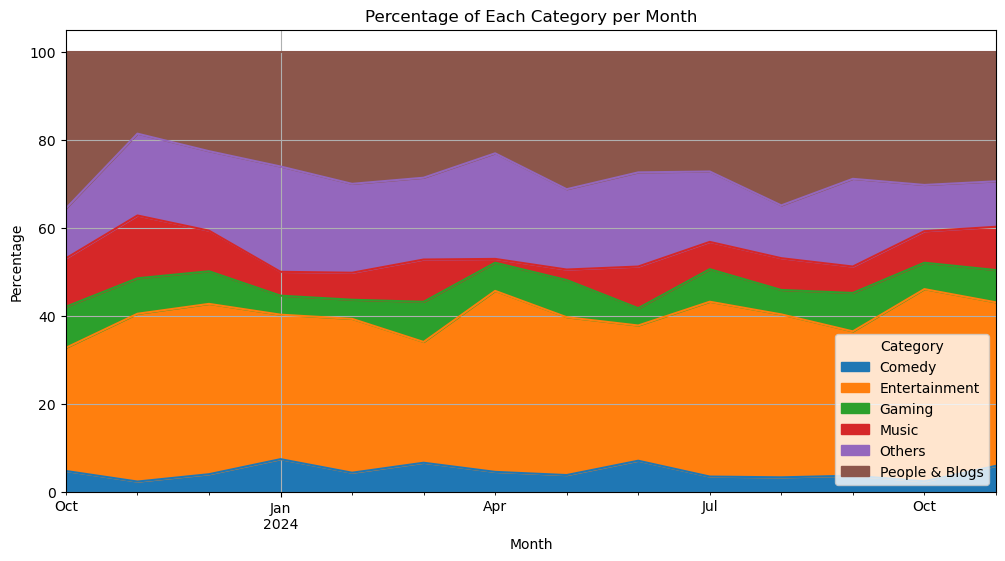

In [ ]:
category_percentage = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100
category_percentage.plot(kind='area', figsize=(12, 6))
plt.title('Percentage of Each Category per Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Category')
plt.grid(True,axis='both')
plt.show()